In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set("notebook", font_scale=1.2, rc={'figure.figsize':(10,8)}, style='whitegrid')
plt.rc("axes.spines", top=False, right=False)

In [2]:
n_events = 400
max_lambda = 20
n_iterations = 100

def test_min_values(lambda_val, n_events): 
    rv = poisson.rvs(mu=lambda_val, size=n_events)
    return rv

In [3]:
r_arr = np.empty([n_events, max_lambda, n_iterations])
for iteration in range(n_iterations):
    for mu in range(max_lambda): 
        r_arr[:, mu, iteration] = test_min_values(mu, n_events) 

In [4]:
lambda_tile = np.tile(range(max_lambda), n_events*n_iterations)

In [5]:
b=pd.Panel(np.rollaxis(r_arr,2)).to_frame()
b.set_index(b.index.labels[0]).reset_index()
r_df_melted=pd.melt(b, value_name='dist_sample', var_name = 'iteration')

/Users/Krista/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
r_df_melted['lambda_val'] = lambda_tile

In [7]:
r_df_melted['min_sample']=r_df_melted.groupby(['lambda_val', 'iteration'])['dist_sample'].transform(np.min)
r_df_melted['max_sample']=r_df_melted.groupby(['lambda_val', 'iteration'])['dist_sample'].transform(np.max)

r_df_melted['var_samples']=r_df_melted.groupby(['lambda_val', 'iteration'])['dist_sample'].transform(np.var)

In [8]:
n_lambda_vals = len(range(max_lambda))

In [10]:
# #proportion of distribution greater than n
# #TODO: bug
# prop_greater = np.empty([n_events*n_lambda_vals, max_lambda, n_iterations])
# var = np.empty([n_events*n_lambda_vals, max_lambda, n_iterations])

# for iteration in range(n_iterations):
#     for criterion in range(max_lambda): 
#         prop_greater[:, criterion, iteration] = r_df_melted.groupby(['lambda_val', 'iteration'])['dist_sample'].transform(lambda x:(x >= criterion).sum()/n_events)
#         var[:, criterion, iteration] = r_df_melted.groupby(['lambda_val', 'iteration'])['dist_sample'].transform(lambda x:np.var(x))

In [11]:
# prop_greater_df = pd.melt(pd.DataFrame(prop_greater), var_name='criterion', value_name = 'proportion_greater')

In [12]:
# lambda_val = np.tile(r_df_melted.lambda_val, max_lambda)

In [13]:
# prop_greater_df['lambda_val'] = lambda_val

([<matplotlib.axis.XTick at 0x117613978>,
 <a list of 10 Text xticklabel objects>)

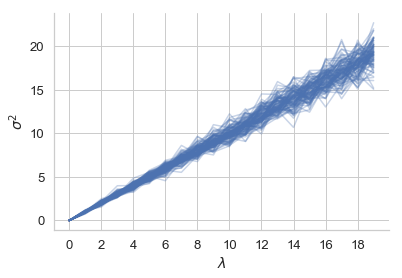

In [18]:
sns.lineplot(x='lambda_val', y='var_samples', units='iteration', data=r_df_melted, estimator=None, alpha=0.3 )
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\sigma^2$')
plt.xticks(np.arange(0,max_lambda, 2))
# plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))

([<matplotlib.axis.XTick at 0x117531b00>,
 <a list of 10 Text xticklabel objects>)

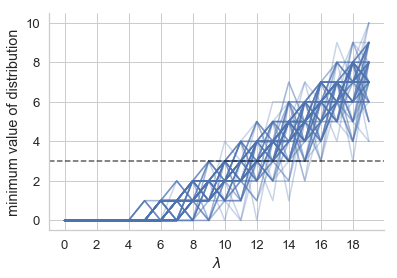

In [19]:
#put CIs on these
# plt.plot(r_df_melted.lambda_val, r_df_melted.min_sample, '.-')
sns.lineplot(x='lambda_val', y='min_sample', units='iteration', data=r_df_melted, estimator=None, alpha=0.3)

plt.xlabel(r'$\lambda$')
plt.ylabel('minimum value of distribution')
plt.axhline(y=3,linestyle= '--', color='k', alpha=0.7)
plt.xticks(np.arange(0,max_lambda, 2))

# plt.axvline(x=min_3_lambda, linestyle='--')

#go down to 10, exclude values less than 3. 
#talk about how exactly to set up the pilot. 

In [ ]:
lambda12 = prop_greater_df.loc[prop_greater_df.lambda_val == 12]
lambda10 = prop_greater_df.loc[prop_greater_df.lambda_val == 10]
lambda8 = prop_greater_df.loc[prop_greater_df.lambda_val == 8]
lambda6 = prop_greater_df.loc[prop_greater_df.lambda_val == 6]
lambda4 = prop_greater_df.loc[prop_greater_df.lambda_val == 4]
lambda2 = prop_greater_df.loc[prop_greater_df.lambda_val == 2]

In [ ]:
plt.plot(lambda12.criterion, lambda12.proportion_greater, '.-', label=r'$\lambda=12$')
plt.plot(lambda10.criterion, lambda10.proportion_greater, '.-', label=r'$\lambda=10$')
plt.plot(lambda8.criterion, lambda8.proportion_greater, '.-', label=r'$\lambda=8$')
plt.plot(lambda6.criterion, lambda6.proportion_greater, '.-', label=r'$\lambda=6$')
plt.plot(lambda4.criterion, lambda4.proportion_greater, '.-', label=r'$\lambda=4$')
plt.plot(lambda2.criterion, lambda2.proportion_greater, '.-', label=r'$\lambda=2$')

plt.xlabel('criterion')
plt.ylabel('proportion of dist. >= criterion')
plt.legend()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(prop_greater_df['lambda_val'], prop_greater_df['criterion'], prop_greater_df['proportion_greater'], c='skyblue', s=60)
ax.view_init(80, 185)
plt.xlabel('lambda')
plt.ylabel('criterion')
ax.set_zlabel('proportion of distribution greater than criterion')
# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [ ]:
# take unique values of lambda, and the same values of criterion, make those x and y, then mesh them
# Then, take all of values of z and reshape that array so it is 2D